# Training Neural Network Fashion MNIST Dataset to its's best accuracy(1/2)


***Table Of Content:***

    1. Problems in training deep neural networks
    
    2. Non-saturating activation functions: ReLU, Leaky ReLU, PReLU, ELU, SELU RReLU
    
    3. Batch Normalization
    
    4. Unsupervised pretraining

**Problems in training deep neural networks**
1. Vanishing/Exploding Gradients Problem
2. Not enough training data
3. Too slow
4. Overfitting

**What is Vanishing Gradients?**

1. Vanishing Gradient occurs when the derivative or slope will get smaller and smaller as we go backward with every layer during backpropagation.

2. When weights update is very small or exponential small, the training time takes too much longer, and in the worst case, this may completely stop the neural network training.

**The root of vanishing gradients**

1. A vanishing Gradient problem occurs with the sigmoid and tanh activation function because the derivatives of the sigmoid and tanh activation functions are between 0 to 0.25 and 0–1.

2. Therefore, the updated weight values are small, and the new weight values are very similar to the old weight values. This leads to Vanishing Gradient problem.

3. A solution: use the ReLU activation function because the gradient is 0 for negatives and zero input, and 1 for positive input.

**What is Exploding Gradients?**

1. Exploding gradient occurs when the derivatives or slope will get larger and larger as we go backward with every layer during backpropagation.

**The root of exploding gradients**

1. This problem happens because of weights, not because of the activation function.
2. Due to high weight values, the derivatives will also higher so that the new weight varies a lot to the older weight, and the gradient will never converge.
3. it may result in oscillating around minima and never come to a global minima point.

# **Nonsaturating Activation Functions**

* the problems with unstable gradients were in part due to a poor choice of activation function

* sigmoid activation functions are not the best choice in deep neural networks

* in particular, ReLU does not saturate for positive values

**The issues of ReLU**

* the dying ReLUs: some neurons die. They stop outputting anything other than 0.
* A neuron dies when its weights get tweaked in such a way that the weighted sum of its inputs (X.w+b) are negative for all instances in the training set.
* In some cases, half of the network’s neurons are dead, especially if you used a large learning rate
* Gradient Descent does not affect it anymore because the gradient of the ReLU function is zero when its input is negative

In [57]:
#Implementing Relu in TensorFlow
keras.layers.Dense(10, activation="relu")

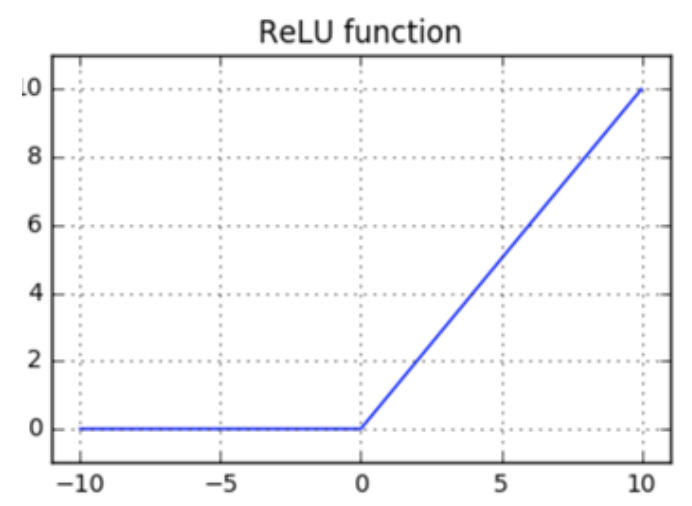

# The solution: Leaky ReLU

* This small slope ensures that leaky ReLUs never die
* They have a chance to eventually wake up

***the leaky variants always outperformed the strict ReLU activation function***

In [58]:
Leaky Relu function
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

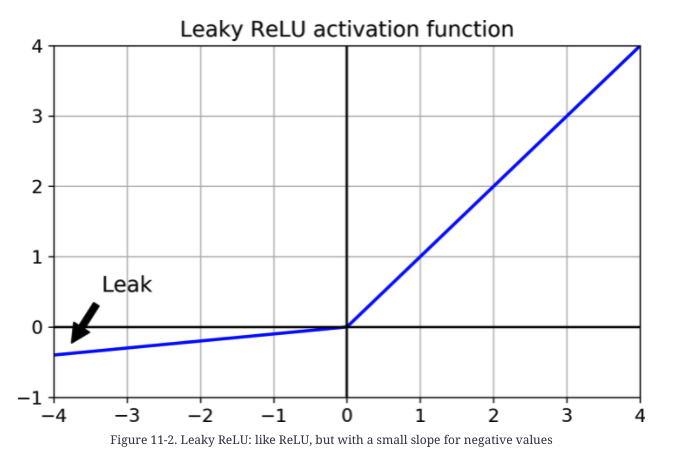

# Other variations

* ***randomized leaky ReLU (RReLU)*** -- where $α$ is picked randomly in a given range during
training and is fixed to an average value during testing
    * RReLU performed fairly well and seemed to act as a regularizer (reducing the risk of overfitting the training
set)


* ***parametric leaky ReLU (PReLU)***, where $α$ is authorized to be learned during training
    * PReLU was reported to strongly outperform ReLU on large image datasets, but on smaller datasets it runs the risk of overfitting the training set.
    
    
* ***exponential linear unit (ELU)***, outperformed all the ReLU variants


* ***Scaled ELU (SELU)***, is a scaled variant of the ELU activation function


* [Activation Functions Explained - GELU, SELU, ELU, ReLU and more](https://mlfromscratch.com/activation-functions-explained/#/)

In [59]:
def elu(z, alpha=0.01):
    return np.where(z<0,alpha*(np.exp(z)-1), z)

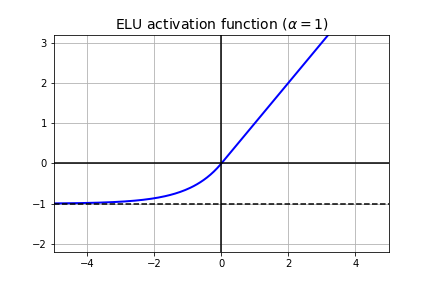

***notes***

* The hyperparameter $α$ defines the value that the ELU function approaches when z is a large negative number. 
* It is usually set to 1, but you can tweak it like any other hyperparameter.
* It has a nonzero gradient for z < 0, which avoids the dead neurons problem.
* If $α$ is equal to 1 then the function is smooth everywhere, including around z = 0

* Exponential Linear Unit with a=1 and its derivative
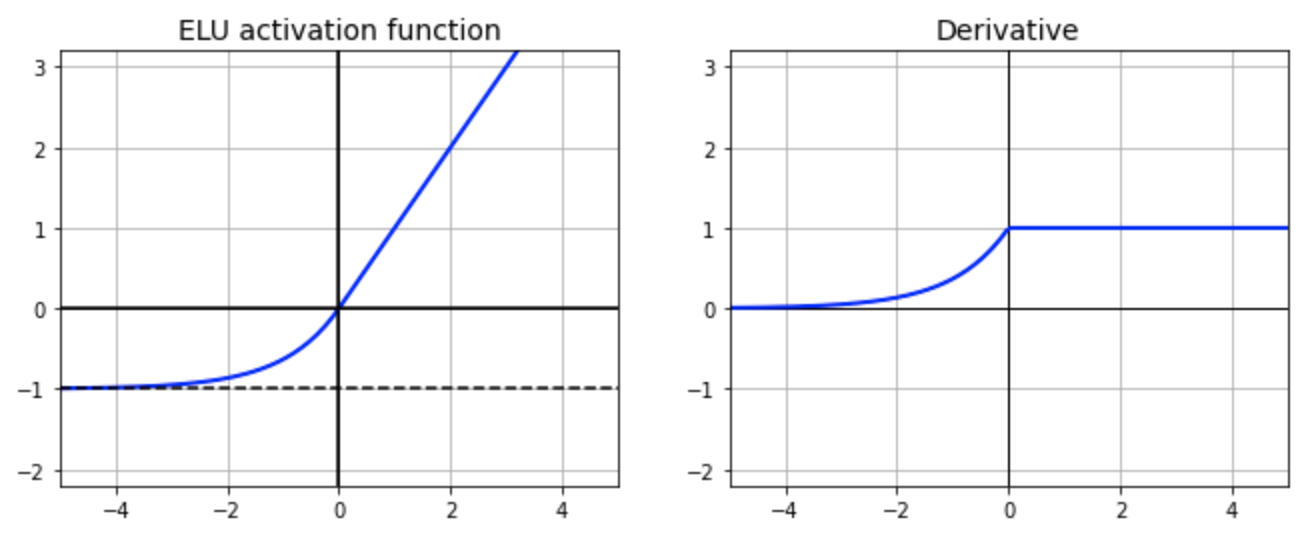

***Main drawback***

* slower to compute than the ReLU function and its variants

* Implementing ELU in TensorFlow is trivial, just specify the activation function when building each layer:

In [36]:
keras.layers.Dense(10, activation="elu")

# Time to train the neural network on Fashion MNIST dataset

In this example we only care about the accuracy score

In [45]:
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [46]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
#Scaling pixel quality to 0-1 by dividing the dataset with the highest value of 255
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

***Activation Function: Relu***

In [60]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=[28,28]), #28*28=784
    keras.layers.Dense(128, activation="relu"), #variance=2/fan_in
    
    keras.layers.LeakyReLU(), #LeakyReLUα(z) = max(αz, z) #keras.layers.LeakyReLU(alpha=0.3, **kwargs)
    keras.layers.Dense(48, activation="relu"),
    keras.layers.Dense(10, activation='softmax')
])

In [61]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-3
                                             ),
              metrics=["accuracy"])

In [62]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.5035 - accuracy: 0.8205 - val_loss: 0.3828 - val_accuracy: 0.8630
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3725 - accuracy: 0.8638 - val_loss: 0.3812 - val_accuracy: 0.8596
Epoch 3/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3378 - accuracy: 0.8767 - val_loss: 0.3180 - val_accuracy: 0.8840
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3136 - accuracy: 0.8853 - val_loss: 0.3103 - val_accuracy: 0.8866
Epoch 5/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2985 - accuracy: 0.8895 - val_loss: 0.2980 - val_accuracy: 0.8898
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2828 - accuracy: 0.8959 - val_loss: 0.3085 - val_accuracy: 0.8898
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2728 - accuracy: 0.8997 - val_loss: 0.2948 - val_ac

In [63]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [64]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [65]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

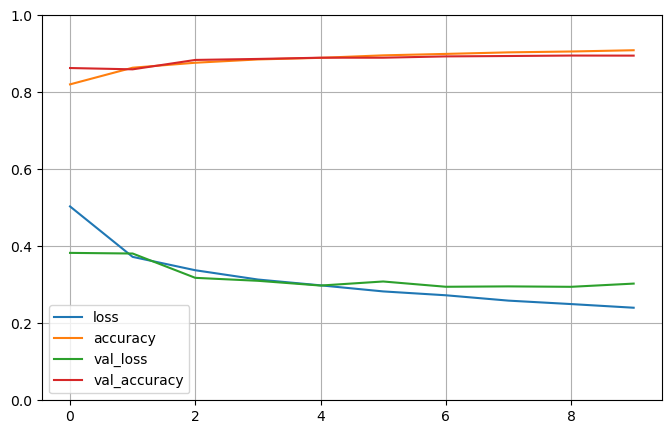

In [66]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot")
plt.show()

***Notes***

* Both the training accuracy and the validation accuracy steadily increase during training, while the training loss and the validation loss decrease.
* The validation curves are close to the training curves, which means that there is not too much overfitting.
* The validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch, so the training curve should be shifted by half an epoch to the left.

***Activation Function: PRelu***
    
    To use the PReLU activation function, create a PReLU layer and add it to your model just after the layer you want to apply it to

In [74]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(48, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [75]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [76]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 1.5135 - accuracy: 0.5623 - val_loss: 1.0269 - val_accuracy: 0.6882
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.8943 - accuracy: 0.7133 - val_loss: 0.7821 - val_accuracy: 0.7468
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7423 - accuracy: 0.7556 - val_loss: 0.6916 - val_accuracy: 0.7726
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6671 - accuracy: 0.7778 - val_loss: 0.6282 - val_accuracy: 0.7910
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6195 - accuracy: 0.7930 - val_loss: 0.5895 - val_accuracy: 0.8056
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5856 - accuracy: 0.8017 - val_loss: 0.5618 - val_accuracy: 0.8120
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5604 - accuracy: 0.8095 - val_loss: 0.5394 - val_ac

In [77]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [78]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [79]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

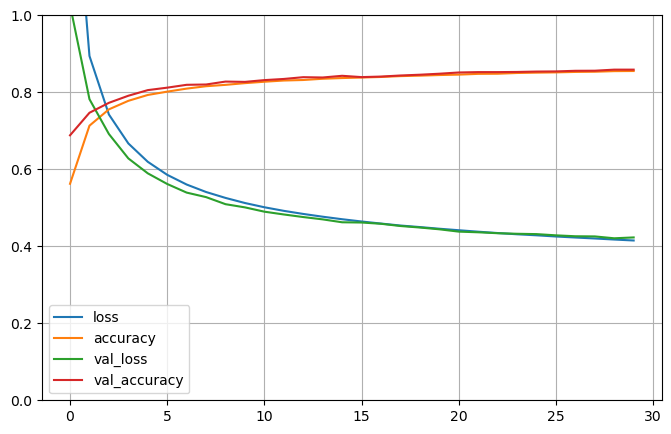

In [80]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot")
plt.show()

# Batch Normalization

* Although using He initialization along with ELU (or any variant of ReLU) can significantly reduce the danger of the vanishing/exploding gradients problems at the beginning of training, it doesn’t guarantee that they won’t come back during training

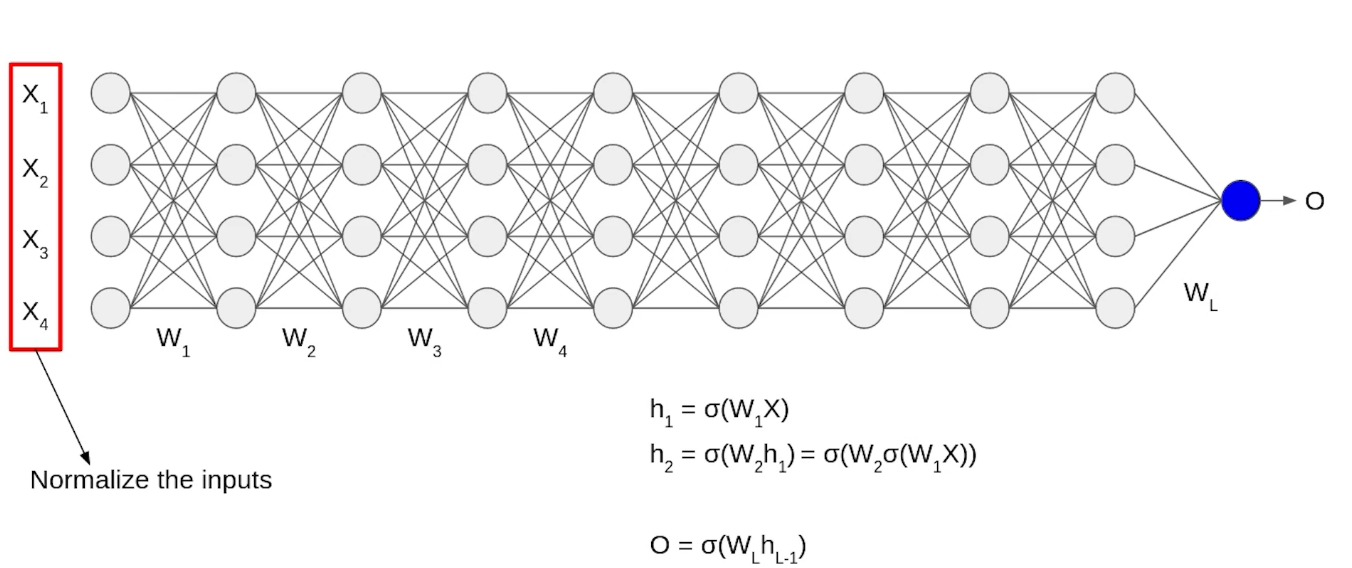

* Input X was normalized with time, but the output will no longer be on the same scale. 
* As the data go through multiple layers of the neural network and L activation functions are applied, it leads to an internal co-variate shift in the data.

***The idea to solve the problem***

* Need to normalize the outputs of each hidden layer to make every layer see the normalized input 

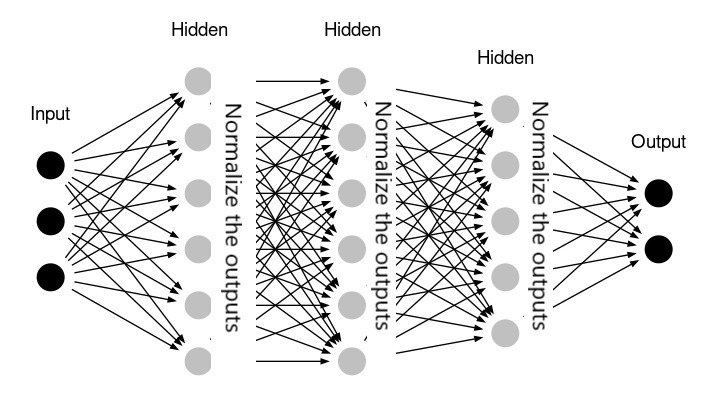

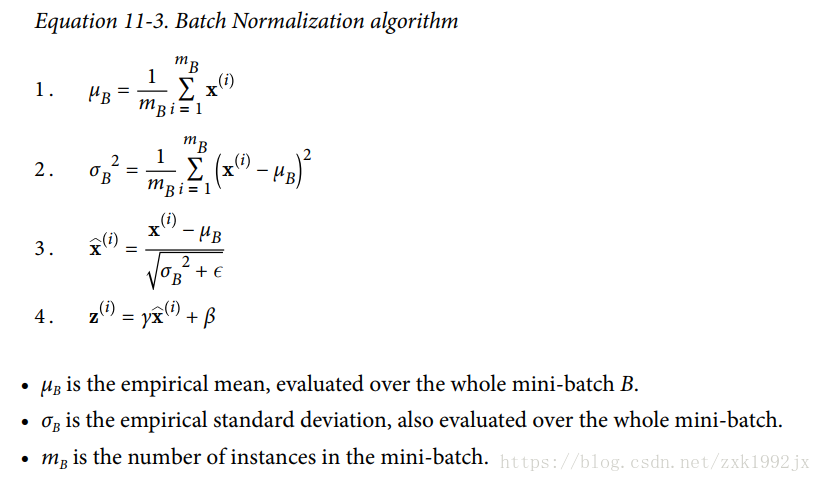

In [82]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [83]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_25 (Dense)            (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_26 (Dense)            (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [84]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [85]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [86]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.8293 - accuracy: 0.7222 - val_loss: 0.5539 - val_accuracy: 0.8156
Epoch 2/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5703 - accuracy: 0.8036 - val_loss: 0.4792 - val_accuracy: 0.8380
Epoch 3/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.5161 - accuracy: 0.8215 - val_loss: 0.4425 - val_accuracy: 0.8496
Epoch 4/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4788 - accuracy: 0.8315 - val_loss: 0.4214 - val_accuracy: 0.8560
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4548 - accuracy: 0.8405 - val_loss: 0.4051 - val_accuracy: 0.8618
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4386 - accuracy: 0.8445 - val_loss: 0.3931 - val_accuracy: 0.8636
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4254 - accuracy: 0.8504 - val_loss: 0.3830 - val_ac

# Reusing Pretrained Layers

Let's split the fashion MNIST training set in two:

* X_train_A: all images of all items except for sandals and shirts (classes 5 and 6).
* X_train_B: a much smaller training set of just the first 200 images of sandals or shirts.

The validation set and the test set are also split this way, but without restricting the number of images.

* We will train a model on set A (classification task with 8 classes), and try to reuse it to tackle set B (binary classification).
* We hope to transfer a little bit of knowledge from task A to task B, since classes in set A (sneakers, ankle boots, coats, t-shirts, etc.) are somewhat similar to classes in set B (sandals and shirts).
* However, since we are using Dense layers, only patterns that occur at the same location can be reused.

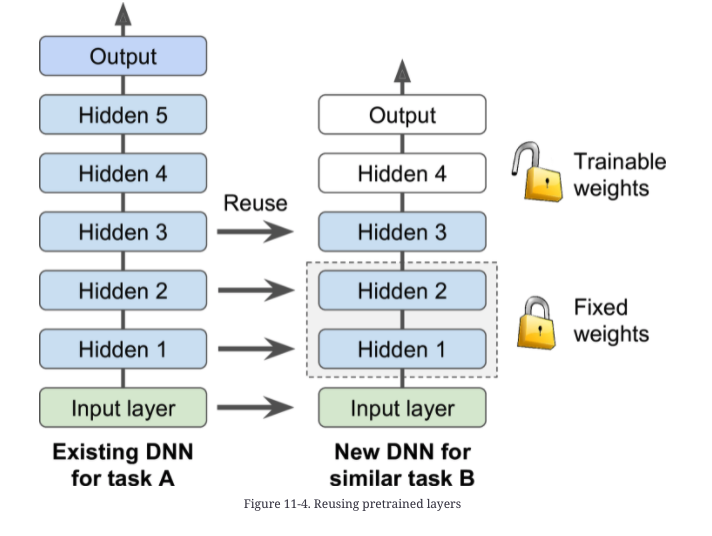

In [87]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [88]:
X_train_A.shape

(43986, 28, 28)

In [89]:
X_train_B.shape

(200, 28, 28)

In [90]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [91]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [92]:
tf.random.set_seed(42)
np.random.seed(42)

In [93]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [94]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [95]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 10s 7ms/step - loss: 0.5926 - accuracy: 0.8104 - val_loss: 0.3891 - val_accuracy: 0.8667
Epoch 2/20
1375/1375 [==============================] - 9s 7ms/step - loss: 0.3523 - accuracy: 0.8787 - val_loss: 0.3287 - val_accuracy: 0.8827
Epoch 3/20
1375/1375 [==============================] - 9s 6ms/step - loss: 0.3170 - accuracy: 0.8895 - val_loss: 0.3011 - val_accuracy: 0.8989
Epoch 4/20
1375/1375 [==============================] - 10s 8ms/step - loss: 0.2973 - accuracy: 0.8974 - val_loss: 0.2896 - val_accuracy: 0.9016
Epoch 5/20
1375/1375 [==============================] - 9s 7ms/step - loss: 0.2835 - accuracy: 0.9021 - val_loss: 0.2776 - val_accuracy: 0.9066
Epoch 6/20
1375/1375 [==============================] - 9s 6ms/step - loss: 0.2730 - accuracy: 0.9064 - val_loss: 0.2738 - val_accuracy: 0.9073
Epoch 7/20
1375/1375 [==============================] - 8s 6ms/step - loss: 0.2641 - accuracy: 0.9092 - val_loss: 0.2719 - val_accurac

In [96]:
model_A.save("my_model_A.h5")

In [97]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [98]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [99]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 72ms/step - loss: 0.9573 - accuracy: 0.4650 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 59ms/step - loss: 0.5692 - accuracy: 0.7450 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 28ms/step - loss: 0.4503 - accuracy: 0.8650 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 35ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 45ms/step - loss: 0.3435 - accuracy: 0.9250 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 68ms/step - loss: 0.3081 - accuracy: 0.9300 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 27ms/step - loss: 0.2800 - accuracy: 0.9350 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [===========

In [100]:
model_B.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 300)               235500    
                                                                 
 dense_35 (Dense)            (None, 100)               30100     
                                                                 
 dense_36 (Dense)            (None, 50)                5050      
                                                                 
 dense_37 (Dense)            (None, 50)                2550      
                                                                 
 dense_38 (Dense)            (None, 50)                2550      
                                                                 
 dense_39 (Dense)            (None, 1)                

In [101]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [102]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [103]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [104]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 54ms/step - loss: 0.5756 - accuracy: 0.6550 - val_loss: 0.5801 - val_accuracy: 0.6400
Epoch 2/4
7/7 [==============================] - 0s 56ms/step - loss: 0.5395 - accuracy: 0.6850 - val_loss: 0.5430 - val_accuracy: 0.6836
Epoch 3/4
7/7 [==============================] - 0s 28ms/step - loss: 0.5030 - accuracy: 0.7350 - val_loss: 0.5113 - val_accuracy: 0.7110
Epoch 4/4
7/7 [==============================] - 0s 11ms/step - loss: 0.4718 - accuracy: 0.7500 - val_loss: 0.4829 - val_accuracy: 0.7383
Epoch 1/16
7/7 [==============================] - 1s 52ms/step - loss: 0.3941 - accuracy: 0.8150 - val_loss: 0.3446 - val_accuracy: 0.8671
Epoch 2/16
7/7 [==============================] - 0s 39ms/step - loss: 0.2787 - accuracy: 0.9350 - val_loss: 0.2597 - val_accuracy: 0.9290
Epoch 3/16
7/7 [==============================] - 0s 28ms/step - loss: 0.2078 - accuracy: 0.9650 - val_loss: 0.2107 - val_accuracy: 0.9554
Epoch 4/16
7/7 [===============

In [105]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 7ms/step - loss: 0.1408 - accuracy: 0.9705


[0.1408407986164093, 0.9704999923706055]

In [106]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9930


[0.06830142438411713, 0.9929999709129333]

Great! We got quite a bit of transfer: the error rate dropped by a factor of 4.5!

In [107]:
(100 - 97.05) / (100 - 99.35)

4.538461538461503

# Unsupervised Pretraining

* You don’t have much labeled training data
* You cannot find a model trained on a similar task
* It is often cheap to gather unlabeled training examples, but expensive to label them


***Solution:***
1. If you can gather plenty of unlabeled training data, you can try to use it to train an unsupervised model, such as an autoencoder or a generative adversarial network.
2. Then you can reuse the lower layers of the autoencoder or the lower layers of the GAN’s discriminator, add the output layer for your task on top
3. Finetune the final network using supervised learning with the expensive labeled training examples
